In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('qsar_fish_toxicity.csv', sep=';', header=None, names=['CICo', 'SM1', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50'])

In [3]:
data.head()

,CICo,SM1,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CICo    908 non-null    float64
 1   SM1     908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


array([[<Axes: title={'center': 'LC50'}>]], dtype=object)

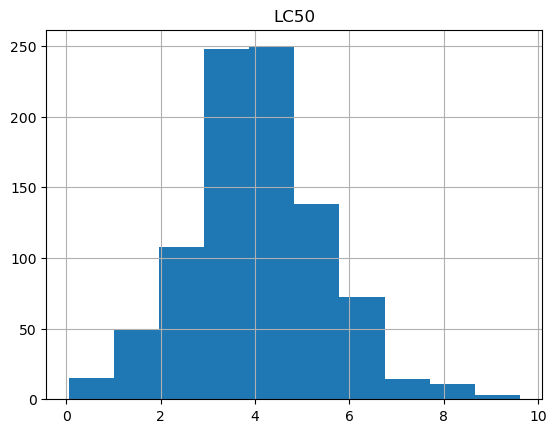

In [37]:
data.hist("LC50")

<Axes: >

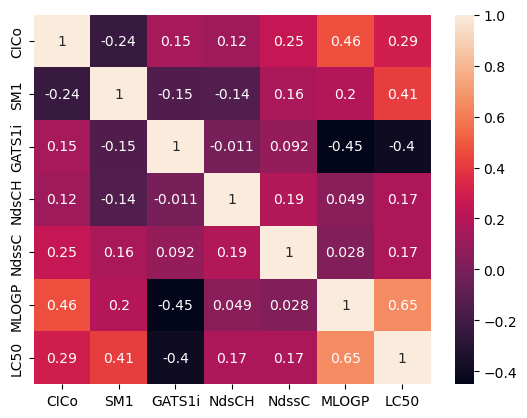

In [38]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='MLOGP', ylabel='LC50'>

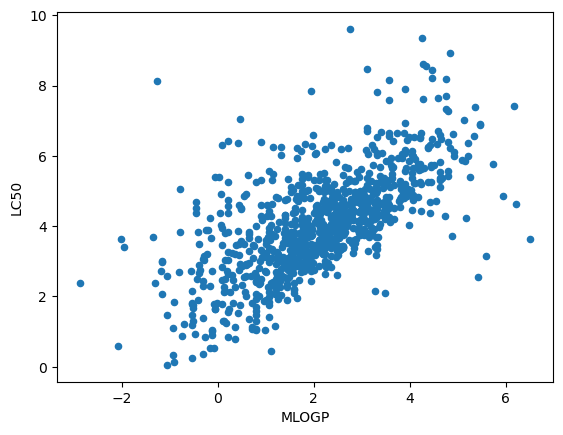

In [39]:
data.plot(kind="scatter", x = "MLOGP" , y = "LC50")

<Axes: xlabel='GATS1i', ylabel='LC50'>

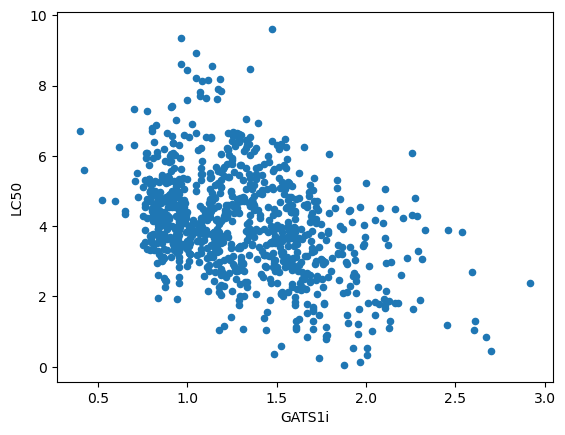

In [41]:
data.plot(kind="scatter", x = "GATS1i" , y = "LC50")

<Axes: xlabel='SM1', ylabel='LC50'>

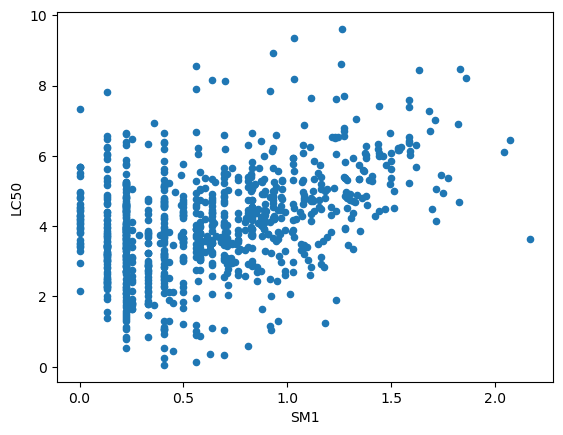

In [42]:
data.plot(kind="scatter", x = "SM1" , y = "LC50")

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = data.drop('LC50', axis=1)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

In [16]:
y = data['LC50'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [18]:
model = make_pipeline(StandardScaler(), SVR())

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(mse)

1.004830444457296


In [23]:
print(r2)

0.5846908772438617


In [24]:
from sklearn.model_selection import  GridSearchCV

In [35]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'svr__C': 1, 'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}


In [43]:
A=data[['GATS1i','MLOGP']]

In [44]:
B = data['LC50']

In [45]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
A_train_interaction = A_train.copy()

In [50]:
A_train_interaction['Interaction'] = A_train['GATS1i'] * A_train['MLOGP']

In [51]:
model.fit(A_train_interaction, B_train)

LinearRegression()

In [52]:
beta0 = model.intercept_
beta1 = model.coef_[0]
beta2 = model.coef_[1]
beta3 = model.coef_[2]

In [53]:
print('Intercept (β0):', beta0)
print('Coefficient for GATS1i (β1):', beta1)
print('Coefficient for MLOGP (β2):', beta2)
print('Coefficient for Interaction (β3):', beta3)

Intercept (β0): 3.28302471885518
Coefficient for GATS1i (β1): -0.39476039211664243
Coefficient for MLOGP (β2): 0.6573921982970481
Coefficient for Interaction (β3): -0.03897429614789394


In [56]:
A_test_interaction = A_test.copy()
A_test_interaction['Interaction'] = A_test['GATS1i'] * A_test['MLOGP']

In [57]:
B_pred = model.predict(A_test_interaction)

In [58]:
mse = mean_squared_error(B_test, B_pred)

In [59]:
mse

1.3598350059929274

In [60]:
r2 = r2_score(B_test, B_pred)

In [61]:
r2

0.4379630050550165

In [62]:
model = SVR(kernel='linear', C=1.0, epsilon=0.1)
model.fit(A_train_interaction, B_train)

SVR(kernel='linear')

In [64]:
B_pred = model.predict(A_test_interaction)

In [65]:
mse = mean_squared_error(B_test, B_pred)

In [66]:
mse

1.4016787376867543

In [67]:
r2 = r2_score(B_test, B_pred)

In [68]:
r2

0.42066846188261864

In [69]:
model.fit(A_train, B_train)

SVR(kernel='linear')

In [70]:
B_pred = model.predict(A_test)

In [71]:
mse = mean_squared_error(B_test, B_pred)

In [72]:
mse

1.4019288535751846

In [73]:
r2 = r2_score(B_test, B_pred)

In [74]:
r2

0.4205650858247133

In [75]:
X = data.drop('LC50', axis=1).values
Y = data['LC50'].values

In [76]:
model = make_pipeline(StandardScaler(), SVR())

In [77]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [78]:
param_grid = {
    'svr__C': [0.1, 1, 10],  # Regularization parameter
    'svr__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svr__degree': [2, 3],  # Degree for polynomial kernel (if used)
    'svr__gamma': ['scale', 'auto'],  # Kernel coefficient (if applicable)
}

In [79]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10], 'svr__degree': [2, 3],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [83]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [84]:
Y_pred = best_model.predict(X_test)

In [85]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [86]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.9565596763568143
R-squared (R2): 0.6046417957945068


In [87]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'svr__C': 1, 'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
